<a href="https://colab.research.google.com/github/KODURISRIHARI/Pandas_Tutorial_/blob/main/pandas_tutorial_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
up = files.upload()

Saving pokemon_data.txt to pokemon_data.txt


##read data from different sources to the colab notebook

In [ ]:
# df = pd.read_csv("pokemon_data.csv")
# df = pd.read_csv("pokemon_data.xlsx")
df = pd.read_csv("pokemon_data.txt",delimiter='\t')
df.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


#### Understandin about our dataset including
- memory size
-type of data stored to the column
-check the null values

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 69.7+ KB


In [ ]:
#columns info
df.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

In [ ]:
#read each row
df.head(3)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False


In [ ]:
#read a specific location of (R,C)
df['Name'][0:2]

,Name
0,Bulbasaur
1,Ivysaur


In [ ]:
for i in df['Name']:
  print(str.lower(i))
  if len(i)>5:
    break

bulbasaur


In [ ]:
## read each column
df[['Name','Type 1']].head(2)

,Name,Type 1
0,Bulbasaur,Grass
1,Ivysaur,Grass


In [ ]:
#read specif rows
df.iloc[2:4]

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
2,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False


In [ ]:
#reset index with inplace = true will updated to the dataset if not it will be executed as a temporay operation
df.reset_index(inplace=True)

In [ ]:
#read specific rows and specific columsn
print(df.iloc[1,2]) #read a single value in a specific column
print(df.iloc[[2,3],2]) #read a more than single values or rows with specific single columns
print(df.iloc[[2,20],2])

Grass
2    Grass
3    Grass
Name: Type 1, dtype: object
2      Grass
20    Normal
Name: Type 1, dtype: object


In [ ]:
#delete specific rows or columns based on the axis
# df.drop(['level_0','index'],axis=1,inplace=True,errors='ignore')

In [ ]:
#df.reset_index()

In [ ]:
#df.set_index('index')

In [ ]:
#df.loc , you know the column name then use loc otherwise iloc
print(df.loc[[2,4],['Name']]) #selects mentioned rows and column
print(df.loc[2:5,'Name':'HP']) #selects sliced rows and columns using slicing
print(df.loc[df['Type 1'] == 'Grass'])  # Selects all rows where the value in the 'Type 1' column is 'Grass'
df.loc[[24,27],['Name','HP']] #select mentioned records of rows and colums using indexing

         Name
2    Venusaur
4  Charmander
                    Name Type 1  Type 2  HP
2               Venusaur  Grass  Poison  80
3  VenusaurMega Venusaur  Grass  Poison  80
4             Charmander   Fire     NaN  39
5             Charmeleon   Fire     NaN  58
                      Name Type 1    Type 2   HP  Attack  Defense  Sp. Atk  \
0                Bulbasaur  Grass    Poison   45      49       49       65   
1                  Ivysaur  Grass    Poison   60      62       63       80   
2                 Venusaur  Grass    Poison   80      82       83      100   
3    VenusaurMega Venusaur  Grass    Poison   80     100      123      122   
48                  Oddish  Grass    Poison   45      50       55       75   
..                     ...    ...       ...  ...     ...      ...      ...   
718                Chespin  Grass       NaN   56      61       65       48   
719              Quilladin  Grass       NaN   61      78       95       56   
720             Chesnaught  Grass  F

,Name,HP
24,Rattata,30
27,Fearow,65


In [ ]:
for index,row in df.iterrows():
  print(index,row['HP'])
  if index == 3:
    break
print(df['HP'].head(4))

0 45
1 60
2 80
3 80
0    45
1    60
2    80
3    80
Name: HP, dtype: int64


In [ ]:
df.loc[df['Type 2']=='Grass'].head(2)

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
51,Paras,Bug,Grass,35,70,55,45,55,25,1,False
52,Parasect,Bug,Grass,60,95,80,60,80,30,1,False


In [ ]:
df.describe()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [ ]:
df.sort_values(by='Name').head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
510,Abomasnow,Grass,Ice,90,92,75,92,85,60,4,False
511,AbomasnowMega Abomasnow,Grass,Ice,90,132,105,132,105,30,4,False
68,Abra,Psychic,NaN,25,20,15,105,55,90,1,False
392,Absol,Dark,NaN,65,130,60,75,60,75,3,False
393,AbsolMega Absol,Dark,NaN,65,150,60,115,60,115,3,False


In [ ]:
df.sort_values('Name',ascending=False).head()

,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
794,Zygarde50% Forme,Dragon,Ground,108,100,121,81,95,95,6,True
695,Zweilous,Dark,Dragon,72,85,70,65,70,58,5,False
46,Zubat,Poison,Flying,40,45,35,30,40,55,1,False
631,Zorua,Dark,NaN,40,65,40,80,40,65,5,False
632,Zoroark,Dark,NaN,60,105,60,120,60,105,5,False


In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import numpy as np

In [ ]:
x=np.array([1,5,3])

In [ ]:
y=np.array([2,4,5])

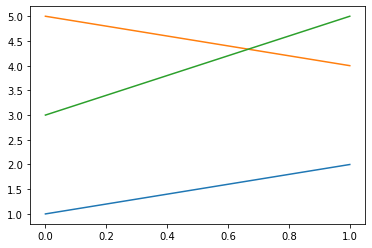

In [ ]:
plt.plot([x,y])

Text(0.5, 1.0, 'Info')

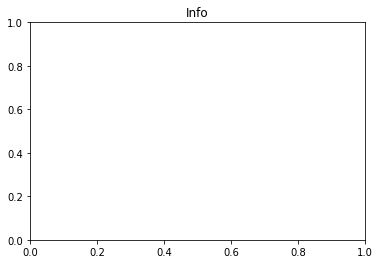

In [ ]:
plt.title('Info')

Text(0.5, 0, 'X-axis')

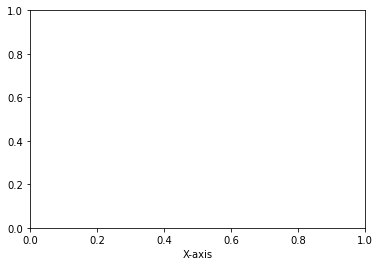

In [ ]:
plt.xlabel('X-axis')

Text(0, 0.5, 'Y-axis')

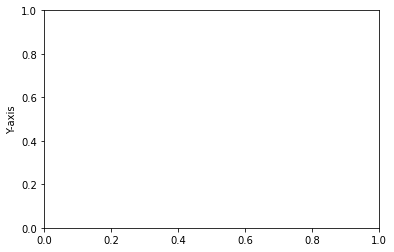

In [ ]:
plt.ylabel('Y-axis')

In [ ]:
plt.show()

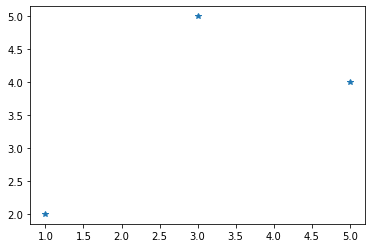

In [ ]:
plt.plot(x,y,'*')

In [ ]:
xy=np.array([2,3,5])

In [ ]:
xp=np.array([3,4,5])

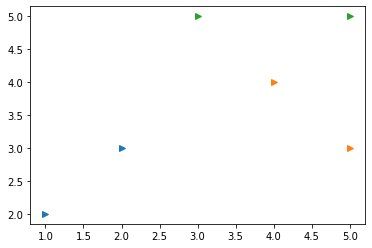

In [ ]:
plt.plot([x,y],[xy,xp],'>')

([<matplotlib.patches.Wedge at 0x7f7ce5988750>,
 [Text(2.913047121678846, 1.0602624518856607, ''),
  Text(-3.9068269497839805, 3.278216463939134, ''),
  Text(3.050001071648902, -5.28275434436815, '')])

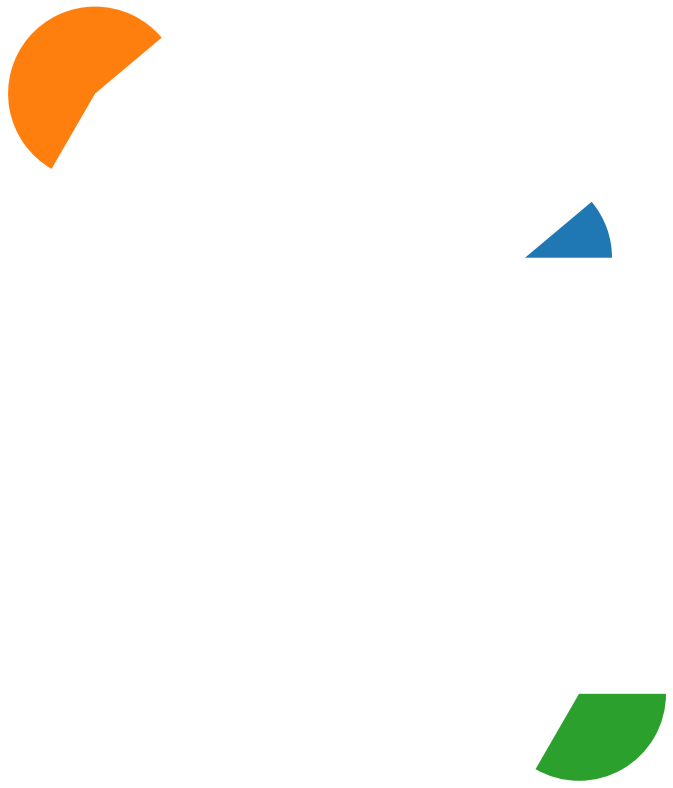

In [ ]:
plt.pie(x,y)

TypeError: ignored

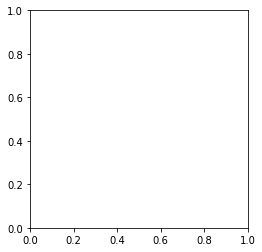

In [ ]:
plt.pie([x,y],[xy,xp])

In [ ]:
plt.bar([x,y])

TypeError: ignored

<BarContainer object of 3 artists>

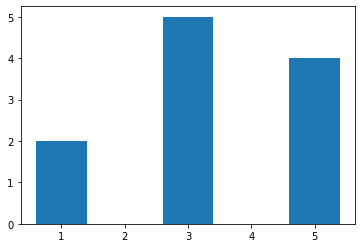

In [ ]:
plt.bar(x,y)

TypeError: ignored

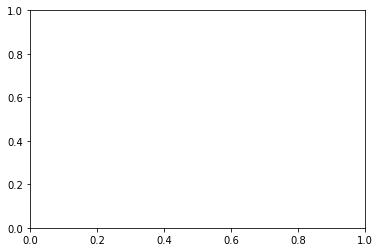

In [ ]:
plt.bar([x,y],[xy,xp])

In [ ]:
import matplotlib.style as styles

In [ ]:
x=[2,3]

In [ ]:

y=[3,4]

In [ ]:
z=[2,4]

In [ ]:
s=[3,5]

In [ ]:
use.style('ggplot')

NameError: ignored

In [ ]:
use.styles('ggplot')

NameError: ignored

In [ ]:
styles.use('ggplot')

No handles with labels found to put in legend.


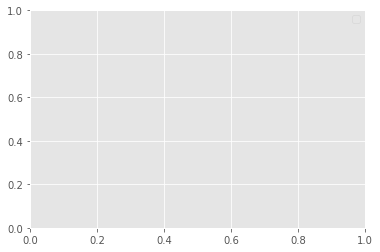

In [ ]:
plt.legend()

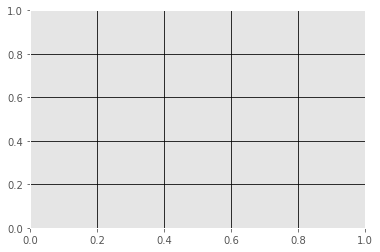

In [ ]:
a=plt.grid(True,color='K')

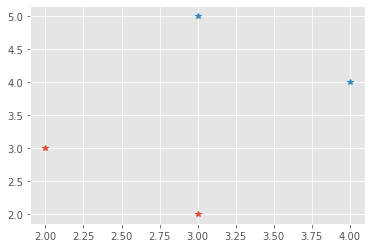

In [ ]:
a=plt.plot([x,y],[s,z],'*',label='Fisrst line')

In [ ]:
plt.show(a)

In [ ]:
plt.show()

([<matplotlib.patches.Wedge at 0x7f7ce5653d10>,
 [Text(0.33991867422268784, 1.0461621742897658, '3'),
  Text(-0.3399185762739153, -1.046162206115244, '4')])

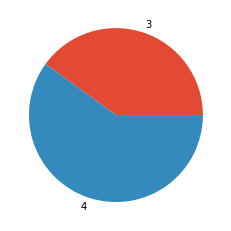

In [ ]:
plt.pie(x,labels=y)